<a href="https://colab.research.google.com/github/KrDoesCoding/DiabetesDetectionMLModel_Repo/blob/main/DiabetesDetectionMLModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset
dataset = np.loadtxt('diabetes.csv', delimiter=',', skiprows=1)
X = dataset[:, 0:8]
Y = dataset[:, 8]

# Step 2: Normalize the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32).reshape(-1, 1)

In [ ]:
class ExpandedNet(nn.Module):
    def __init__(self):
        super(ExpandedNet, self).__init__()
        self.fc1 = nn.Linear(8, 64)      # 8 input features -> 64 neurons
        self.fc2 = nn.Linear(64, 128)    # 64 neurons -> 128 neurons
        self.fc3 = nn.Linear(128, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 64)    # 128 neurons -> 64 neurons
        self.fc6 = nn.Linear(64, 1)      # 64 neurons -> 1 output (binary)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.3) # Dropout with a probability of 0.3

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.relu(self.fc4(x))
        x = self.dropout(x)
        x = self.relu(self.fc5(x))
        x = self.fc6(x)                   # Output layer (no activation here, because we'll use sigmoid in the loss function)
        return x


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Training the model using K-Fold Cross-Validation
n_epochs = 100
batch_size = 64
fold = 0

for train_index, val_index in kf.split(X):
    fold += 1
    print(f'Fold {fold}')

    # Train/Test Split for this fold
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]

    model = ExpandedNet()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    loss_fn = nn.BCEWithLogitsLoss()

    # Training Loop
    for epoch in range(n_epochs):
        model.train()

        # Mini-batch training
        for i in range(0, len(X_train), batch_size):
            X_batch = X_train[i:i+batch_size]
            Y_batch = Y_train[i:i+batch_size]

            Y_pred = model(X_batch)
            loss = loss_fn(Y_pred, Y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch + 1}/{n_epochs}, Loss: {loss.item()}')

    # Validation
    model.eval()
    with torch.no_grad():
        Y_val_pred = torch.sigmoid(model(X_val))
        Y_val_pred = Y_val_pred.round()
        accuracy = accuracy_score(Y_val, Y_val_pred)
        precision = precision_score(Y_val, Y_val_pred)
        recall = recall_score(Y_val, Y_val_pred)
        f1 = f1_score(Y_val, Y_val_pred)
        print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')


Fold 1
Epoch 10/100, Loss: 0.3894311189651489
Epoch 20/100, Loss: 0.31669315695762634
Epoch 30/100, Loss: 0.34939903020858765
Epoch 40/100, Loss: 0.3327823877334595
Epoch 50/100, Loss: 0.29902154207229614
Epoch 60/100, Loss: 0.295874685049057
Epoch 70/100, Loss: 0.257386714220047
Epoch 80/100, Loss: 0.3410024344921112
Epoch 90/100, Loss: 0.2281322479248047
Epoch 100/100, Loss: 0.19323551654815674
Accuracy: 0.7207792207792207, Precision: 0.5967741935483871, Recall: 0.6727272727272727, F1 Score: 0.6324786324786325
Fold 2
Epoch 10/100, Loss: 0.42142149806022644
Epoch 20/100, Loss: 0.3355291783809662
Epoch 30/100, Loss: 0.334652841091156
Epoch 40/100, Loss: 0.33039945363998413
Epoch 50/100, Loss: 0.2674562633037567
Epoch 60/100, Loss: 0.27872541546821594
Epoch 70/100, Loss: 0.26637500524520874
Epoch 80/100, Loss: 0.27243396639823914
Epoch 90/100, Loss: 0.2473495602607727
Epoch 100/100, Loss: 0.2104955017566681
Accuracy: 0.7857142857142857, Precision: 0.625, Recall: 0.7446808510638298, F1 S

Epoch 10/100, Loss: 1.411243498325348
Epoch 20/100, Loss: 1.0880948873236775
Epoch 30/100, Loss: 1.45766856148839
Epoch 40/100, Loss: 0.8501612935215235
Epoch 50/100, Loss: 1.070022763684392
Epoch 60/100, Loss: 0.8563612215220928
Epoch 70/100, Loss: 0.7223963029682636
Epoch 80/100, Loss: 0.8307672208175063
Epoch 90/100, Loss: 0.9567714370787144
Epoch 100/100, Loss: 1.231408360414207


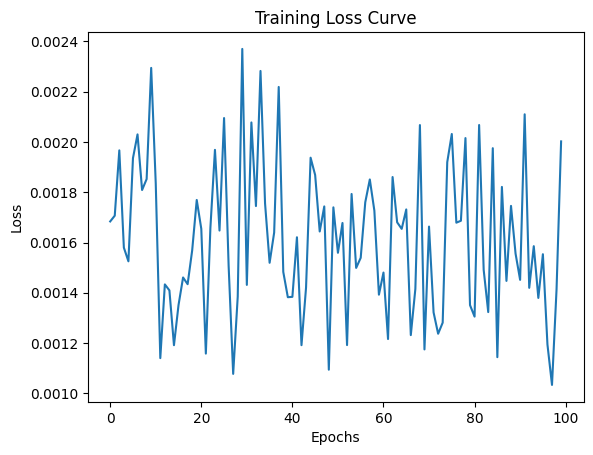

In [ ]:
# Step 5: Plot the loss curve for each epoch
train_losses = []

for epoch in range(n_epochs):
    model.train()
    epoch_loss = 0

    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i+batch_size]
        Y_batch = Y_train[i:i+batch_size]

        Y_pred = model(X_batch)
        loss = loss_fn(Y_pred, Y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    train_losses.append(epoch_loss / len(X_train))

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}/{n_epochs}, Loss: {epoch_loss}')

# Plot the loss curve
plt.plot(range(n_epochs), train_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()


In [ ]:
with torch.no_grad():
    Y_pred = torch.sigmoid(model(X))
    Y_pred = Y_pred.round()

    accuracy = accuracy_score(Y, Y_pred)
    precision = precision_score(Y, Y_pred)
    recall = recall_score(Y, Y_pred)
    f1 = f1_score(Y, Y_pred)

    print(f'Final Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')


Final Accuracy: 0.9114583333333334, Precision: 0.8816793893129771, Recall: 0.8619402985074627, F1 Score: 0.8716981132075472


In [ ]:
torch.save(model.state_dict(), 'model_weights.pth')

In [ ]:
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()  # Set the model to evaluation mode before making predictions

<ipython-input-100-84353565622a>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_weights.pth'))


ExpandedNet(
  (fc1): Linear(in_features=8, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=64, bias=True)
  (fc6): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.3, inplace=False)
)

In [ ]:
new_data = torch.tensor([new_sample], dtype=torch.float32)  # Ensure new data is preprocessed similarly
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    prediction = model(new_data)
    prediction = torch.sigmoid(prediction).round()  # For binary classification
print(f'Predicted class: {prediction.item()}')